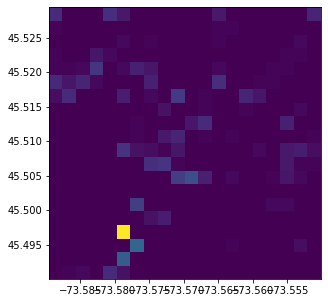

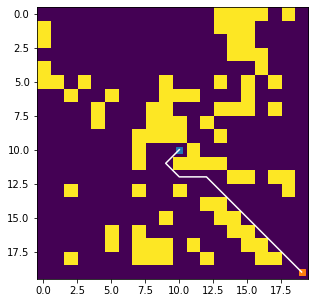

In [44]:
import geopandas as gp
from geopandas import GeoDataFrame
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
from descartes import PolygonPatch
from shapely.geometry import Point,Polygon,MultiPolygon
from shapely.ops import nearest_points
import seaborn as sns
import math 
import heapq
%matplotlib inline
import _locale
_locale._getdefaultlocale = (lambda *args: ['en_US', 'utf8'])




def showMap():
    shape = gp.read_file("D:\Shape\crime_dt.shp")
    path = "D:\Shape\crime_dt.shp"
    test = GeoDataFrame.from_file(path,encoding='latin-1')
    sf = shp.Reader(path,encoding='latin-1')

    points = test['geometry']
    xA = np.array(test['geometry'].x)
    yA = np.array(test['geometry'].y)
    
    
    
    xMin, xMax, yMin, yMax = -73.59,-73.55,45.49,45.53
    noOfRows = math.ceil((xMax - xMin)/0.002)
    noOfColumns = math.ceil((yMax - yMin)/0.002)  
    
    parseShow = np.array([[0]*20]*20)
    for i in range(20):
        for j in range(20):
            parseShow[i][j] = 1
    
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(parseShow)
    
    
    
    
    plot1 = np.array([])
    plot = np.array([])
    weights = np.array([])
    
    
    for i in range(len(xA)):
        if xA[i] not in plot:
            plot = np.append(plot,xA[i])
#             weights = np.append(plot,1)
        if  yA[i] not in plot1:
            plot1 = np.append(plot1,yA[i])
#             weights = np.append(plot1,1)
        
    calculateThreshold(points,xA,yA,50)
    lat_grid_num = 25
    lng_grid_num = 25
    fig_size = [5,5]
    plt.rcParams["figure.figsize"] = fig_size
    H, xedges, yedges = np.histogram2d(xA,yA,bins=(noOfRows,noOfColumns))
#     l = plt.hist2d(plot,plot1,bins=(noOfRows,noOfColumns),density=True)
    
    
    
    H = np.rot90(H) 
    H = np.flipud(H)
    xbins = np.digitize(xA, xedges[1:-1])
    ybins = np.digitize(yA, yedges[1:-1])
#     Hmasked = np.ma.masked_where(H==0,H)
    
#     fig1 = plt.figure()
#     plt.hist2d(xA,yA,bins=noOfRows)
    
    start = (0,0)
    end = (0,19)
    a = np.array([[]])
    for i in range(len(H)):
        for j in range(21):
            if H[i][j] > 0:
                a = np.append(a,1)
            else:
                a = np.append(a,0)
 
    
def heuristic(a, b):
    return np.sqrt((b[0] - a[0]) ** 2 + (b[1] - a[1]) ** 2)

def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0),(1,1),(1,-1),(-1,1),(-1,-1)]

    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:

        current = heapq.heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
                
    return False

#proper calculation of threshold is left !    
def calculateThreshold(points,xA,yA,threshold):
    xMin, xMax, yMin, yMax = -73.59,-73.55,45.49,45.53
    noOfRows = math.ceil((xMax - xMin)/0.002)
    noOfColumns = math.ceil((yMax - yMin)/0.002)  
    
    crimeDict = {}
    
    for i in range(len(points)):
        k = xA[i],yA[i]
        if k in crimeDict.keys():
            crimeDict[xA[i],yA[i]]  = crimeDict[xA[i],yA[i]] + 1  
        else:
            crimeDict[xA[i],yA[i]] = 1
        
    
    threshold50 = 50
    threshold75 = 75
    threshold90 = 90
    
    listX = np.array([])
    listY = np.array([])
    weights = np.array([])
    crimeDict = sorted(crimeDict.items(), key=lambda kv: kv[1], reverse=True)
    
    parse = np.array([[0]*20]*20)
    
    if threshold == 50:
        for i in range(int(len(crimeDict)/2)):
            k = xA[i],yA[i]
            listX = np.append(listX,xA[i])
            listY = np.append(listY,yA[i])
            weights = np.append(weights,1)
    elif threshold == 75:
        for i in range(int(len(crimeDict)/3)):
            listX = np.append(listX,xA[i])
            listY = np.append(listY,yA[i])
    elif threshold == 90:
        for i in range(int(len(crimeDict)/4)):
            listX = np.append(listX,xA[i])
            listY = np.append(listY,yA[i])
    else:
        for i in range(len(crimeDict)):
            listX = np.append(listX,xA[i])
            listY = np.append(listY,yA[i])
            
            
            
    fig_size = [5,5]
    plt.rcParams["figure.figsize"] = fig_size
    l = plt.hist2d(listX,listY,bins=(20,20))
    
    length = (len(l[0]))
    
    
    
    for i in range(0,length-1):
        for j in range(0,length-1):
            if l[0][i][j] > 0:
                parse[i][j]=1 
            else:
                parse[i][j]=0
    
#     print(crimeDict)
#     for j in range(len(parse)):
#            print(parse[j])
    
    start =(10,10)
    goal = (19,19)
    
  
    route = astar(parse, start, goal)
    route = route + [start]
    route = route[::-1]
#     print(route)
    
    x_coords = []
    y_coords = []

    for i in (range(0,len(route))):
        x = route[i][0]
        y = route[i][1]
        x_coords.append(x)
        y_coords.append(y)

     
    # plot map and path
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(parse)
    if parse[start]==1 or parse[goal] == 1:
        print("ROUTE CANNOT BE TRAVERSED !")
    else:
        if threshold == 50 or threshold == 75 or threshold == 90:
            ax.scatter(start[1],start[0], marker = 's')
            ax.scatter(goal[1],goal[0], marker = 's')
            ax.plot(y_coords,x_coords, color = "white")
            plt.show()
    
showMap()
